### 라이브러리 설치

In [33]:
#print(111)

In [34]:
#pip install pandas

In [35]:
#pip install tensorflow

In [36]:
#pip install scikit-learn

In [37]:
#pip install keras

### 간단한 신경망 모델을 구성하고 훈련하는 예제

In [38]:
#간단한 신경망 모델을 구성하고 훈련하는 예제
# 1. 필요한 라이브러리 임포트
# TensorFlow와 Keras의 기능을 사용하기 위해 필요한 모듈을 불러옵니다.
import numpy as np
from tensorflow.keras.models import Sequential # 순차적 모델을 생성하기 위한 모듈
from tensorflow.keras.layers import Dense # 밀집층(fully connected layer)을 추가하기 위한 모듈
from sklearn.model_selection import train_test_split # 데이터를 학습/테스트 세트로 나누기 위한 모듈
from sklearn.datasets import make_classification # 예제 데이터셋 생성 모듈

In [39]:
# 2. 데이터 생성 및 전처리
# 예제용으로 가상 데이터셋을 생성합니다.
X, y = make_classification(
    n_samples=1000, # 데이터 샘플 수
    n_features=20, # 특징(특성) 수
    n_classes=2, # 클래스 수 (이진 분류)
    random_state=42 # 랜덤 시드 고정 (결과 재현 가능성 보장)
)
# 데이터를 학습용(train)과 테스트용(test)으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- n_samples를 늘리면 데이터가 많아져 모델이 더 잘 학습할 수 있습니다.
- n_features를 늘리면 입력 데이터가 복잡해집니다.
- test_size를 0.3 등으로 바꾸면 테스트 데이터 비율이 달라집니다.

In [40]:
# 3. 모델 생성
# Sequential()은 모델을 레이어 순서대로 구성할 수 있도록 해줍니다.
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)), # 첫 번째 은닉층
    Dense(8, activation='relu'), # 두 번째 은닉층
    Dense(1, activation='sigmoid') # 출력층 (이진 분류에서 사용)
])
# 여기서 `input_shape`는 입력 데이터의 차원을 지정합니다.(Dense 안쪽에 사용)
# `activation`은 각 층에서 사용할 활성화 함수입니다.
# - relu: 0보다 큰 값은 그대로 두고, 작은 값은 0으로 설정 (비선형성 제공)
# - sigmoid: 출력값을 0과 1 사이로 제한 (이진 분류에서 확률 계산에 유용)
# Dense 바로 뒤에 오는 수는 뉴런 개수로, 일반적으로 2의 n승 형태가 좋다.

c:\Users\choyk\Documents\GitHub\tensor_proj\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- 역할:
    - Sequential로 레이어를 순차적으로 쌓는 신경망 모델을 만듭니다.
    - 첫 번째 레이어는 16개의 뉴런, 두 번째는 8개, 마지막은 1개(이진 분류)입니다.
    - relu는 비선형성을, sigmoid는 확률 출력을 제공합니다.

- 수정 시:
    - 뉴런 수를 늘리면 모델이 더 복잡해져 더 많은 패턴을 학습할 수 있지만, 과적합 위험도 커집니다.
    - 레이어를 추가하면 더 깊은 신경망이 됩니다.
    - activation을 tanh 등으로 바꾸면 학습 특성이 달라집니다

In [41]:
# 4. 모델 컴파일
# 모델 학습 전에 학습 방법(optimizer), 손실 함수(loss), 평가 지표(metrics)를 정의합니다.
model.compile(
    optimizer='adam', # 학습 속도를 조정하며 손실 함수의 최솟값을 찾습니다.
    loss='binary_crossentropy', # 이진 분류에서 자주 사용되는 손실 함수
    metrics=['accuracy'] # 학습 성과를 평가할 지표
)

- 역할:
    - 학습 방법(optimizer), 손실 함수(loss), 평가 지표(metrics)를 지정합니다.
    - adam은 빠르고 안정적인 최적화 방법입니다.
    - binary_crossentropy는 이진 분류에 적합한 손실 함수입니다.

- 수정 시:
    - optimizer를 sgd 등으로 바꾸면 학습 속도나 결과가 달라집니다.
    - loss를 mean_squared_error 등으로 바꾸면 분류 문제에 적합하지 않을 수 있습니다.

In [42]:
# 5. 모델 훈련
# fit() 메서드는 모델을 학습시키는 역할을 합니다.
history = model.fit(
    X_train, y_train, # 학습용 데이터와 레이블
    validation_split=0.2, # 검증 데이터 비율 (학습 데이터의 20%)
    epochs=10, # 학습 반복 횟수
    batch_size=32, # 한 번의 학습에서 사용하는 데이터 샘플 수
    verbose=1 # 학습 진행 상태를 출력
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4482 - loss: 0.7903 - val_accuracy: 0.5938 - val_loss: 0.6996
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5048 - loss: 0.7310 - val_accuracy: 0.6187 - val_loss: 0.6459
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6074 - loss: 0.6388 - val_accuracy: 0.6500 - val_loss: 0.6060
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6724 - loss: 0.6025 - val_accuracy: 0.7125 - val_loss: 0.5706
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6977 - loss: 0.5723 - val_accuracy: 0.7375 - val_loss: 0.5392
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7369 - loss: 0.5539 - val_accuracy: 0.7688 - val_loss: 0.5100
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7792 - loss: 0.5262 - val_accuracy: 0.7875 - val_loss: 0.4843
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8288 - loss: 0.4684 - val_accuracy: 0.8062 - val_loss

- 역할:
    - 모델을 학습시키는 단계입니다.
    - 학습 데이터의 20%를 검증용으로 사용합니다.
    - 10번 반복(epochs)하며, 한 번에 32개씩 데이터를 처리합니다.

- 수정 시:
    - epochs를 늘리면 더 오래 학습하지만, 과적합 위험이 있습니다.
    - batch_size를 줄이면 더 세밀하게 학습하지만 시간이 오래 걸립니다.(낮은 값을 사용하면 일반화를 더 도와줄 수 있다!)
    - validation_split을 조정하면 검증 데이터 비율이 바뀝니다.

In [43]:
# 6. 모델 평가
# 테스트 데이터로 학습된 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"테스트 손실: {test_loss:.4f}, 테스트 정확도: {test_accuracy:.4f}")

# 7. 모델 예측
# 학습된 모델을 사용해 새로운 데이터 예측
predictions = model.predict(X_test[:5]) # 테스트 데이터 중 5개의 샘플 예측
print("예측 결과:", predictions)

# 여기서 predictions의 출력은 확률 값입니다.
# 일반적으로 0.5 이상은 클래스 1, 미만은 클래스 0으로 간주합니다.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7847 - loss: 0.4760  
테스트 손실: 0.4455, 테스트 정확도: 0.8150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
예측 결과: [[0.43662146]
 [0.55498487]
 [0.6608596 ]
 [0.7444078 ]
 [0.8092891 ]]


- 역할:
    - 테스트 데이터 중 5개 샘플에 대해 예측(확률값)을 출력합니다.
    - 0.5 이상이면 클래스 1, 미만이면 클래스 0으로 간주합니다.

- 수정 시:
    - X_test[:5]를 바꾸면 다른 샘플에 대한 예측을 볼 수 있습니다.
    - 임계값(0.5)을 조정하면 분류 기준이 달라집니다.

### 이진 분류 문제 해결

In [44]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [57]:
# 1. 데이터 준비
# 예제 데이터 생성 (여기서는 임의로 데이터를 생성합니다. 실제 데이터로 교체 가능)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, 
                           n_features=20, 
                           n_informative=15,
                           n_redundant=5, 
                           random_state=42)


In [58]:
# 데이터 분할: 훈련, 검증, 테스트 데이터셋 70:15:15
X_train, X_temp, y_train, y_temp = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=42)  # 7:3
#3을 5:5로 분할
X_val, X_test, y_val, y_test = train_test_split(X_temp, 
                                                y_temp,
                                                test_size=0.5, random_state=42) 


In [59]:
# 데이터 정규화 (특성 스케일링)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [60]:
# 2. 모델 설계
# 입력층, 은닉층, 출력층으로 구성된 이진 분류 모델
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)), # 입력층
    
    tf.keras.layers.Dense(64, activation='relu'), # 첫 번째 은닉층.

    tf.keras.layers.Dropout(0.5), # 과적합 방지를 위한Dropout. 뉴런 개수 절반

    tf.keras.layers.Dense(32, activation='relu'), # 두 번째 은닉층

    tf.keras.layers.Dense(1, activation='sigmoid') # 출력층 (Sigmoid 활성화 함수)
])

In [61]:
# 3. 모델 컴파일
# 손실 함수: Binary Cross-Entropy
# 최적화 알고리즘: Adam
# 평가지표: Accuracy
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# 4. Early Stopping 설정(과적합 방지)
# 검증 데이터 손실이 개선되지 않으면 학습을 조기에 종료
# val_loss를 5번동안 보고 개선이 없으면 중단! 이후 베스트 값으로 복원!!
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=5, 
                                                  restore_best_weights=True)

In [ ]:
# 5. 모델 훈련
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping]
                    )

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5444 - loss: 0.7016 - val_accuracy: 0.7867 - val_loss: 0.5882
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6628 - loss: 0.6160 - val_accuracy: 0.8933 - val_loss: 0.4949
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7247 - loss: 0.5557 - val_accuracy: 0.9000 - val_loss: 0.4228
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8158 - loss: 0.4546 - val_accuracy: 0.8933 - val_loss: 0.3601
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8150 - loss: 0.4280 - val_accuracy: 0.9067 - val_loss: 0.3147
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8503 - loss: 0.3711 - val_accuracy: 0.9200 - val_loss: 0.2784
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8246 - loss: 0.3934 - val_accuracy: 0.9133 - val_loss: 0.2574
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8454 - loss: 0.3404 - val_accuracy: 0.9133 - val_loss

In [64]:
# 6. 모델 평가
# 테스트 데이터로 성능 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9156 - loss: 0.1844 
Test Loss: 0.1595, Test Accuracy: 0.9200


In [65]:
# 7. 예측
# 새로운 데이터에 대한 예측 수행
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int) # 0.5를 기준으로 클래스 결정

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [66]:
# 8. 분류 보고서 출력
# 실제 값과 예측 값을 비교하여 성능 지표 확인
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        79
           1       0.92      0.92      0.92        71

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150



In [67]:
#pip install matplotlib

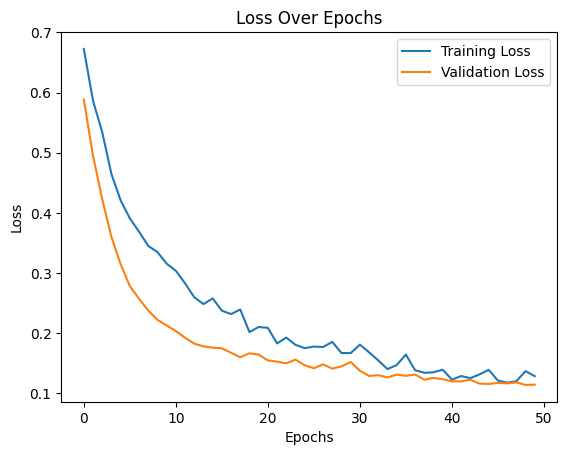

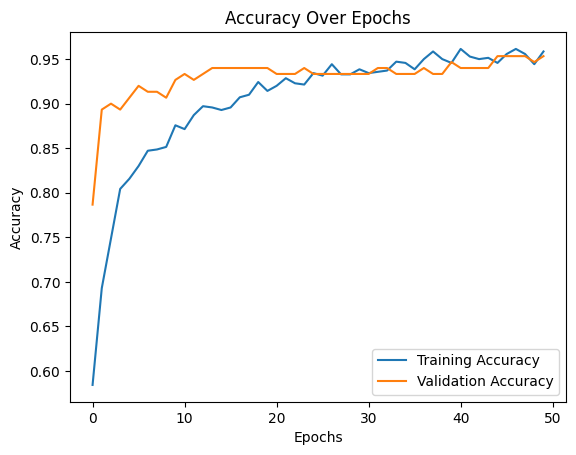

In [68]:
# 9. 학습 결과 시각화 (Optional)
import matplotlib.pyplot as plt
# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### MNIST 데이터셋을 활용한 이미지 분류

In [69]:
# 필요한 라이브러리 가져오기
from tensorflow.keras.models import Sequential # 순차적 모델 생성
from tensorflow.keras.layers import Dense # 완전 연결(Dense) 층
from tensorflow.keras.utils import to_categorical # 원-핫 인코딩
from tensorflow.keras.datasets import mnist # MNIST 데이터셋 가져오기


In [70]:
# 1. 데이터 로드 및 전처리
# MNIST 데이터셋을 훈련 세트와 테스트 세트로 분리
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [71]:
# 입력 데이터(이미지)를 1차원 벡터로 변환하고 정규화 (0~1 범위로 스케일링)
x_train = x_train.reshape(-1, 784) / 255.0 # 28x28 이미지를 784 길이의 벡터로 변환
x_test = x_test.reshape(-1, 784) / 255.0


In [72]:
# 레이블(출력 값)을 원-핫 인코딩 (예: 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [73]:
# 2. 모델 구성
model = Sequential([
# 첫 번째 은닉층: 뉴런 128개, 활성화 함수 ReLU, 입력 크기는 784
Dense(128, activation='relu', input_shape=(784,)),
# 두 번째 은닉층: 뉴런 64개, 활성화 함수 ReLU
Dense(64, activation='relu'),
# 출력층: 뉴런 10개 (클래스 수), 활성화 함수 Softmax
Dense(10, activation='softmax')
])

c:\Users\choyk\Documents\GitHub\tensor_proj\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
# 3. 모델 컴파일
# 손실 함수: Categorical Crossentropy
# 옵티마이저: Adam (효율적인 경사 하강법 알고리즘)
# 평가 지표: 정확도 (accuracy)
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])

In [75]:
# 4. 모델 훈련
# 훈련 데이터(x_train, y_train)로 학습, 검증 데이터로 성능 확인
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8649 - loss: 0.4771 - val_accuracy: 0.9597 - val_loss: 0.1397
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9656 - loss: 0.1163 - val_accuracy: 0.9680 - val_loss: 0.1071
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9778 - loss: 0.0747 - val_accuracy: 0.9710 - val_loss: 0.0943
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9829 - loss: 0.0538 - val_accuracy: 0.9737 - val_loss: 0.0919
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9865 - loss: 0.0417 - val_accuracy: 0.9742 - val_loss: 0.0903
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9887 - loss: 0.0340 - val_accuracy: 0.9688 - val_loss: 0.1177
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9912 - loss: 0.0277 - val_accuracy: 0.9746 - val_loss: 0.1063
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9922 - loss: 0.0234 - 

In [76]:
# 5. 모델 평가
# 테스트 데이터(x_test, y_test)로 모델 성능 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9694 - loss: 0.1292
테스트 정확도: 0.9747999906539917


In [77]:
# 6. 예측
# 테스트 데이터의 첫 번째 샘플을 예측
predictions = model.predict(x_test[:1])
print(f"Softmax 출력: {predictions[0]}") # 각 클래스에 대한 확률 값
print(f"예측 클래스: {predictions.argmax()}") # 확률이 가장 높은 클래스

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Softmax 출력: [1.39430297e-13 1.69423156e-11 4.41706982e-09 1.71675694e-07
 1.04138307e-16 4.56195249e-13 1.12862354e-14 9.99999881e-01
 2.88252006e-10 1.19940680e-08]
예측 클래스: 7
